# Assignment 2: Regression Methods
**Team Members:** 
- Mukesh Thamilvanan, mthamilv
- Siqi Cheng, scheng42

### Selected Datasets
1. Wine Quality Dataset
2. Netflix Dataset


<a id='part1'></a>
## Part II: Linear Regression – Wine Quality Dataset

In [40]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [41]:
# 2. Read, preprocess and print main statistics about the dataset. 
# The Code from PART I
# Read the Wine Quality dataset
df_wine = pd.read_csv('datasets/winequality-red.csv')

# Print main statistics about the dataset
print("First 5 rows of Wine Quality dataset:")
print(df_wine.head())

print("\nDataset Information:")
print(df_wine.info())

print("\nDescriptive Statistics:")
print(df_wine.describe())

print("\nShape of the dataset:")
print(df_wine.shape)

print("\nColumn names in Wine Quality dataset:")
print(df_wine.columns)


First 5 rows of Wine Quality dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1   

In [42]:
# 3. Convert features with string datatype to categorical and normalize non-categorical features if needed
# Check for columns with string datatype and convert them to categorical
for col in df_wine.columns:
    if df_wine[col].dtype == 'object':
        df_wine[col] = df_wine[col].astype('category')

# Normalize non-categorical features (excluding 'Id')
for col in df_wine.columns:
    if col != 'Id' and df_wine[col].dtype != 'category' and df_wine[col].dtype != 'object':
        df_wine[col] = (df_wine[col] - df_wine[col].mean()) / df_wine[col].std()

# Verify the conversion and normalization
print("\nColumn data types after conversion:")
print(df_wine.dtypes)

print("\nFirst 5 rows of the dataset after normalization:")
print(df_wine.head())


Column data types after conversion:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                 float64
dtype: object

First 5 rows of the dataset after normalization:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.528194          0.961576    -1.391037       -0.453077  -0.243630   
1      -0.298454          1.966827    -1.391037        0.043403   0.223805   
2      -0.298454          1.296660    -1.185699       -0.169374   0.096323   
3       1.654339         -1.384011     1.483689       -0.453077  -0.264878   
4      -0.528194          0.961576    -1.391037       -0.453077  -0.243630   

   free sulfur dioxide  total sulfur dioxide  

In [43]:
# 4. Select the target variable y
y = df_wine['quality'].values

In [44]:
# 5. Create data matrices X and y
X = df_wine.drop(columns=['quality']).values
y = y.reshape(-1, 1)

# Add bias term
X = np.hstack((np.ones((X.shape[0], 1)), X))
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1599, 12)
Shape of y: (1599, 1)


In [45]:
# 6. Split the dataset into 80% training and 20% testing sets
split_index = int(0.8 * X.shape[0])
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [46]:
# 7. Print the shape of the datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1279, 12)
y_train shape: (1279, 1)
X_test shape: (320, 12)
y_test shape: (320, 1)


In [47]:
# 8. Calculate the weight vector w using the OLS equation
w = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
print("Weights:", w)

Weights: [[ 0.02920651]
 [ 0.04917558]
 [-0.23320567]
 [-0.04345051]
 [ 0.01849417]
 [-0.10248426]
 [ 0.04300297]
 [-0.15017197]
 [-0.04538778]
 [-0.06528552]
 [ 0.16943512]
 [ 0.37396083]]


In [48]:
# 9. Get predictions
y_pred_train = X_train @ w
y_pred_test = X_test @ w

# Calculate RMSE
rmse_train = np.sqrt(np.mean((y_train - y_pred_train) ** 2))
rmse_test = np.sqrt(np.mean((y_test - y_pred_test) ** 2))


print("RMSE on training set:", rmse_train)
print("RMSE on test set:", rmse_test)


RMSE on training set: 0.798377913572987
RMSE on test set: 0.8134330763107801


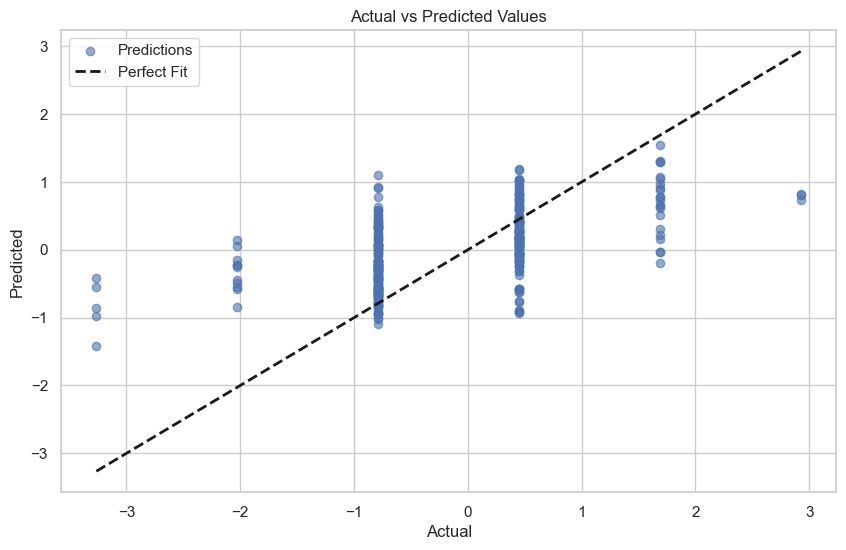

In [49]:
# 10. Plot predictions vs actual data
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.6, color='b', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Fit')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

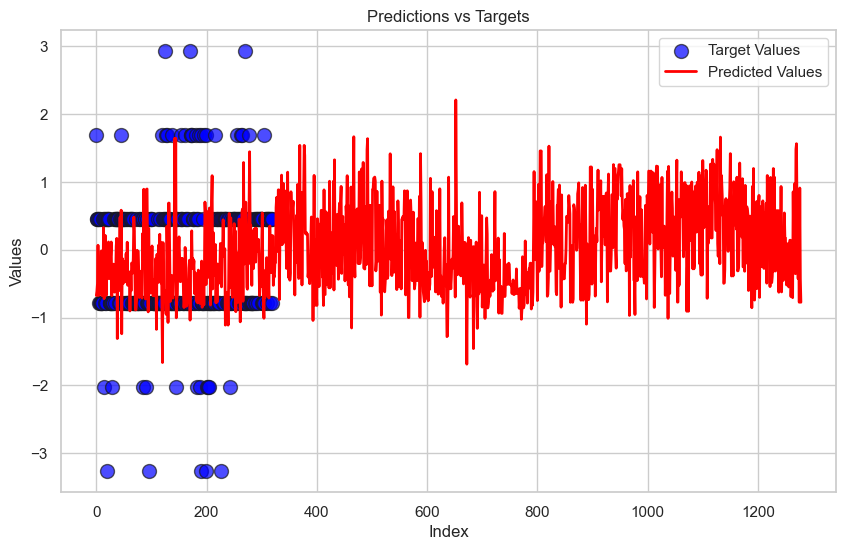

In [50]:
def plot_predictions_and_targets(predictions, targets):
    """
    Plots target values as a scatter plot and predicted values as a line plot.

    Parameters:
    predictions (list or array): The predicted values.
    targets (list or array): The actual target values.
    """
    plt.figure(figsize=(10, 6))

    # Scatter plot for target values
    plt.scatter(range(len(targets)), targets, color='blue', edgecolor='k', alpha=0.7, s=100, label='Target Values')

    # Line plot for predicted values
    plt.plot(range(len(predictions)), predictions, color='red', lw=2, linestyle='-', label='Predicted Values')

    plt.title('Predictions vs Targets')
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_predictions_and_targets(y_pred_train, y_test)

<a id='part1'></a>
## Part III: Rodge Regression – Wine Quality Dataset

In [51]:
#1. Convert features with string datatype to categorical and normalize non-categorical features
import numpy as np
import pandas as pd

# Load the dataset
df_wine = pd.read_csv('datasets/winequality-red.csv')

# Convert features with string datatype to categorical
# In this dataset, there are no string type features to convert.

In [52]:
# Select the target variable
y = df_wine['quality'].values

In [53]:
# 3. Create the data matrix
X = df_wine.drop(columns=['quality']).values

# Add a bias term (column of ones)
X = np.hstack((np.ones((X.shape[0], 1)), X))

In [54]:
#4. Split the dataset into training and test sets
split_index = int(0.8 * X.shape[0])
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [55]:
#5. Print the shape of training and test sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1279, 12)
y_train shape: (1279,)
X_test shape: (320, 12)
y_test shape: (320,)


In [56]:
#6. Calculate the weights with the Ridge Regression equation.
# Set the regularization parameter lambda (can be adjusted as needed)
lambda_reg = 1.0

# Calculate the weight vector for Ridge Regression
I = np.eye(X_train.shape[1])  # Identity matrix
I[0, 0] = 0  # Do not regularize the bias term
w_ridge = np.linalg.inv(X_train.T @ X_train + lambda_reg * I) @ X_train.T @ y_train


In [57]:
#7. Predict training and test set values for Ridge Regression
y_train_pred_ridge = X_train @ w_ridge
y_test_pred_ridge = X_test @ w_ridge

# Calculate the RMSE for Ridge Regression
rmse_train_ridge = np.sqrt(np.mean((y_train - y_train_pred_ridge) ** 2))
rmse_test_ridge = np.sqrt(np.mean((y_test - y_test_pred_ridge) ** 2))

print("Ridge Regression RMSE on Training Set:", rmse_train_ridge)
print("Ridge Regression RMSE on Test Set:", rmse_test_ridge)

Ridge Regression RMSE on Training Set: 0.6454028731361967
Ridge Regression RMSE on Test Set: 0.6582388965491944


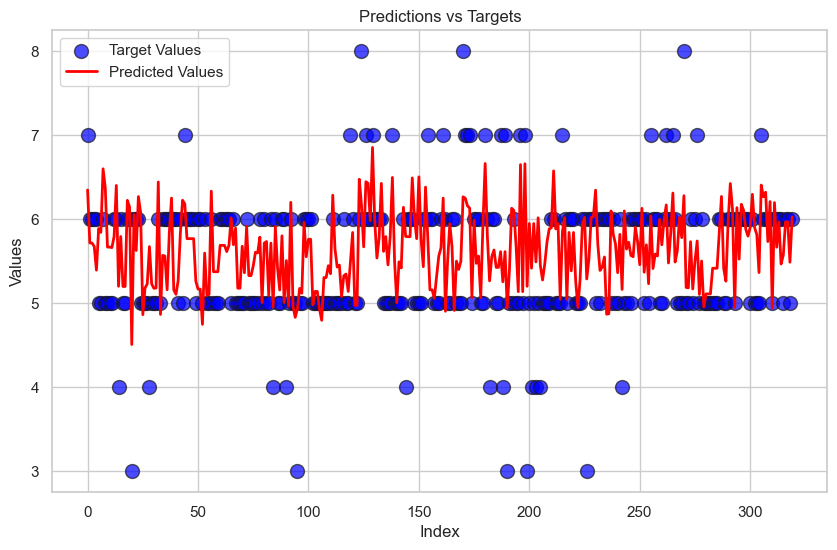

In [58]:
# Plot predictions vs actual values for Ridge Regression
plot_predictions_and_targets(y_test_pred_ridge, y_test)

<a id='part1'></a>
## Part II: Linear Regression – Netflix Titles Dataset

In [ ]:
## 1. Load the Netflix dataset
df_netflix = pd.read_csv('datasets/netflix_titles.csv')

In [ ]:
print("First head rows of Netflix dataset:")
print(df_netflix.head())

print("\nDataset Information:")
print(df_netflix.info())

print("\nDescriptive Statistics:")
print(df_netflix.describe())

print("\nMissing values count in each column:")
print(df_netflix.isnull().sum())

print("\nColumn names in Netflix Titles dataset:")
print(df_netflix.columns)

print("\nShape of the dataset:")
print(df_netflix.shape)

In [ ]:
# Converting Columns to Categorical
for col in df_netflix.columns:
    if df_netflix[col].dtype == 'object':
        df_netflix[col] = df_netflix[col].astype('category')
print(df_netflix.dtypes)


In [ ]:
#Normalize Non-categorical Data
# Can't normarlize release year as every year is unique to the title

In [ ]:
# Target y 

df_netflix['show_id_num'] = df_netflix['show_id'].str.extract('(\d+)').astype(int)

# Independent variable (X) and dependent variable (Y)
X = df_netflix['show_id_num'].values
y = df_netflix['release_year'].values

In [ ]:
# data matrices for X and Y
# X = df_netflix.drop(columns=['release_year']).values
# y = y.reshape(-1, 1)

# Add bias term
X = np.vstack((np.ones(len(X)), X)).T
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

In [ ]:
# dividing dataset to train (80) and test (20)
split_idx = int(0.8 * X.shape[0])
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

In [ ]:
# calculating the weigths
w = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
print("Weights:", w)

# x and y predictions
y_pred_train = X_train @ w
y_pred_test = X_test @ w

In [ ]:
# calc RMSE
rmse_train = np.sqrt(np.mean((y_train - y_pred_train) ** 2))
rmse_test = np.sqrt(np.mean((y_test - y_pred_test) ** 2))

print("RMSE Data")
print(f'Training RMSE: {rmse_train}')
print(f'Testing RMSE: {rmse_test}')

In [ ]:
#plotting the graph
plt.figure(figsize=(10, 6))

plt.scatter(X_train[:, 1], y_train, color='blue', label='Training data')
plt.scatter(X_test[:, 1], y_test, color='green', label='Testing data')

plt.plot(X_train[:, 1], y_pred_train, color='red', label='Regression line (Train)')
plt.plot(X_test[:, 1], y_pred_test, color='orange', label='Regression line (Test)')

plt.xlabel('Show ID (numerical)')
plt.ylabel('Release Year')
plt.title('Linear Regression')
plt.legend()
plt.show()

<a id='part1'></a>
## Part III: Rodge Regression – Wine Quality Dataset